In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 

In [99]:
data=pd.read_csv("Market.csv")
data

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,5/25/2021,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,5/26/2021,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,5/27/2021,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [100]:
df=pd.DataFrame(data).round().drop('Volume',axis=1)
df

,Index,Date,Open,High,Low,Close,Adj Close
0,NYA,12/31/1965,529.0,529.0,529.0,529.0,529.0
1,NYA,1/3/1966,527.0,527.0,527.0,527.0,527.0
2,NYA,1/4/1966,528.0,528.0,528.0,528.0,528.0
3,NYA,1/5/1966,531.0,531.0,531.0,531.0,531.0
4,NYA,1/6/1966,532.0,532.0,532.0,532.0,532.0
...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.0,16509.0,16375.0,16465.0,16465.0
13944,NYA,5/25/2021,16465.0,16526.0,16375.0,16390.0,16390.0
13945,NYA,5/26/2021,16390.0,16466.0,16388.0,16452.0,16452.0
13946,NYA,5/27/2021,16452.0,16546.0,16452.0,16532.0,16532.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13948 entries, 0 to 13947
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13948 non-null  object 
 1   Date       13948 non-null  object 
 2   Open       13947 non-null  float64
 3   High       13946 non-null  float64
 4   Low        13945 non-null  float64
 5   Close      13944 non-null  float64
 6   Adj Close  13938 non-null  float64
dtypes: float64(5), object(2)
memory usage: 762.9+ KB


In [102]:
df1=pd.read_csv("Market.csv",usecols=['Open','High','Low','Close','Adj Close','Date'],
        index_col='Date',parse_dates=['Date'])


In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13948 entries, 1965-12-31 to 2021-05-28
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       13947 non-null  float64
 1   High       13946 non-null  float64
 2   Low        13945 non-null  float64
 3   Close      13944 non-null  float64
 4   Adj Close  13938 non-null  float64
dtypes: float64(5)
memory usage: 653.8 KB


In [104]:
df1.round()

,Open,High,Low,Close,Adj Close
Date,,,,,
1965-12-31,529.0,529.0,529.0,529.0,529.0
1966-01-03,527.0,527.0,527.0,527.0,527.0
1966-01-04,528.0,528.0,528.0,528.0,528.0
1966-01-05,531.0,531.0,531.0,531.0,531.0
1966-01-06,532.0,532.0,532.0,532.0,532.0
...,...,...,...,...,...
2021-05-24,16375.0,16509.0,16375.0,16465.0,16465.0
2021-05-25,16465.0,16526.0,16375.0,16390.0,16390.0
2021-05-26,16390.0,16466.0,16388.0,16452.0,16452.0


Text(0.5, 0, 'Date')

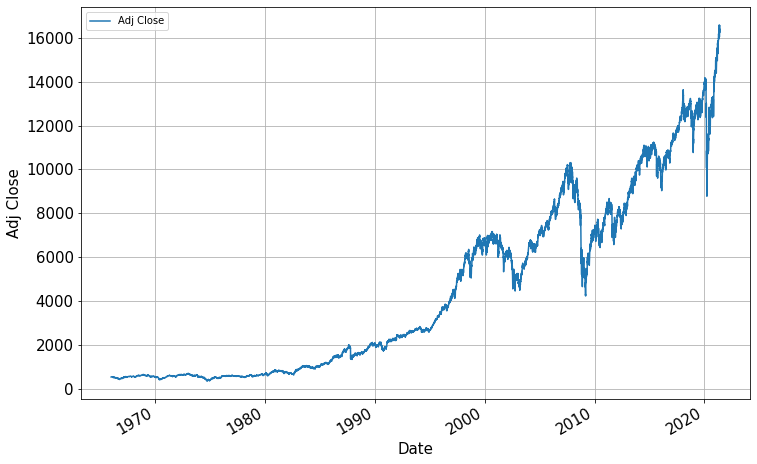

In [105]:
df1.plot(y='Adj Close',figsize=(12,8),grid=True,fontsize=15)
plt.ylabel('Adj Close', fontsize=15)
plt.xlabel('Date',fontsize=15)

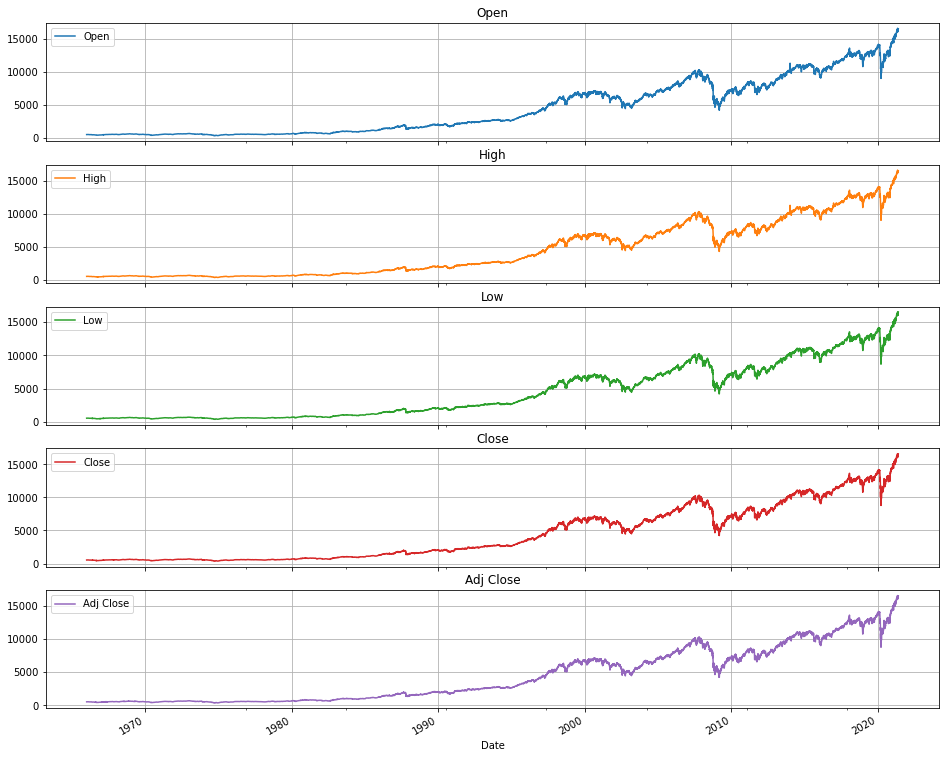

In [106]:
df1.plot(y=['Open','High','Low','Close','Adj Close'],figsize=(16,14),grid=True,subplots=True,
         title=['Open','High','Low','Close','Adj Close']);

In [107]:
mask=df1.index<'1970'
mask

array([ True,  True,  True, ..., False, False, False])

<AxesSubplot:xlabel='Date'>

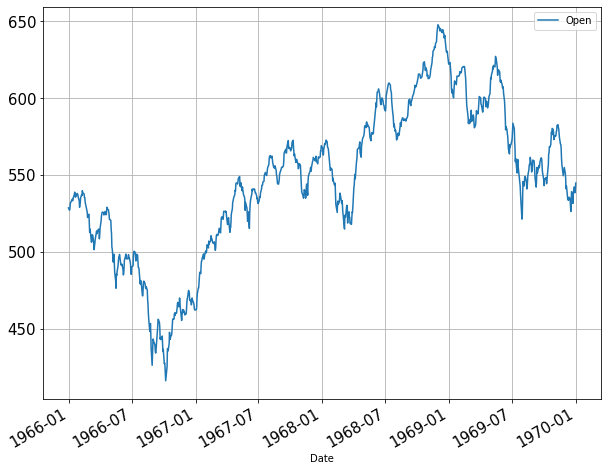

In [108]:
df1[mask].plot(y='Open',figsize=(10,8),fontsize=15,grid=True)

<AxesSubplot:xlabel='Date'>

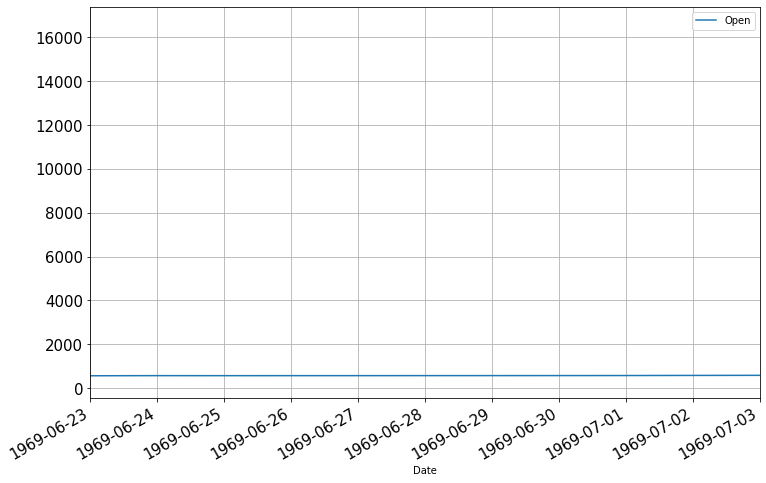

In [109]:
df1.plot(y='Open',figsize=(12,8),grid=True,xlim=['1969-06-23','1969-07-03'],fontsize=15)

<AxesSubplot:xlabel='Date'>

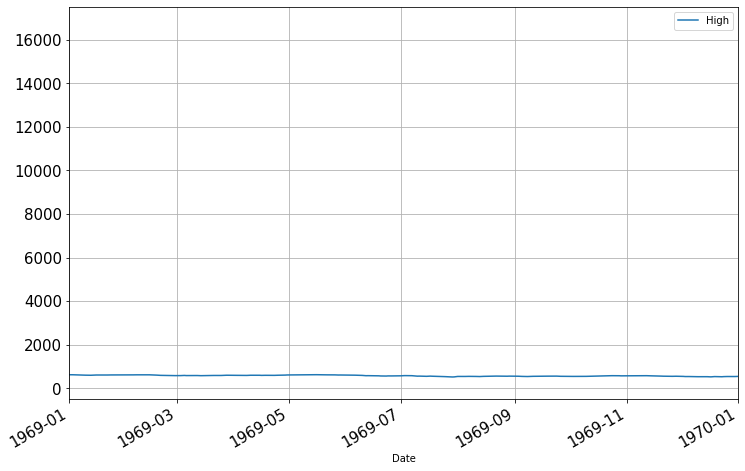

In [110]:
df1.plot(y='High',figsize=(12,8),grid=True,xlim=['1969','1970'],fontsize=15)

<AxesSubplot:xlabel='Date'>

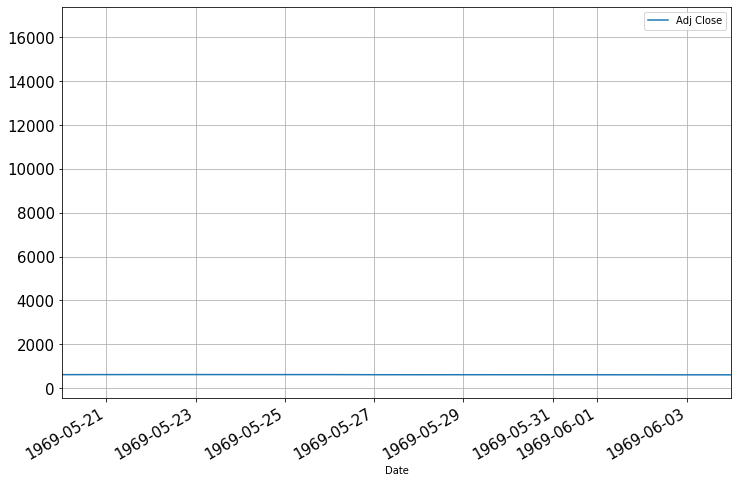

In [111]:
df1.plot(y='Adj Close',figsize=(12,8),grid=True,xlim=['1969-05-20','1969-06-04'],fontsize=15)

In [112]:
df1

,Open,High,Low,Close,Adj Close
Date,,,,,
1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002
1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022
1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027
1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995
1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007
...,...,...,...,...,...
2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450
2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450
2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940


In [113]:
df1.describe()

,Open,High,Low,Close,Adj Close
count,13947.000000,13946.000000,13945.000000,13944.000000,13938.000000
mean,4451.778151,4468.525849,4434.262223,4453.026486,4454.699913
std,4074.953735,4095.171230,4052.815490,4075.483921,4075.562630
min,347.769989,347.769989,347.769989,347.769989,347.769989
25%,654.940002,654.964996,655.039978,655.122513,655.780029
50%,2631.800049,2631.854981,2631.909912,2632.015014,2632.489990
75%,7339.489990,7376.315063,7277.509766,7339.397583,7342.787598
max,16590.429690,16685.890630,16531.949220,16590.429690,16590.429690


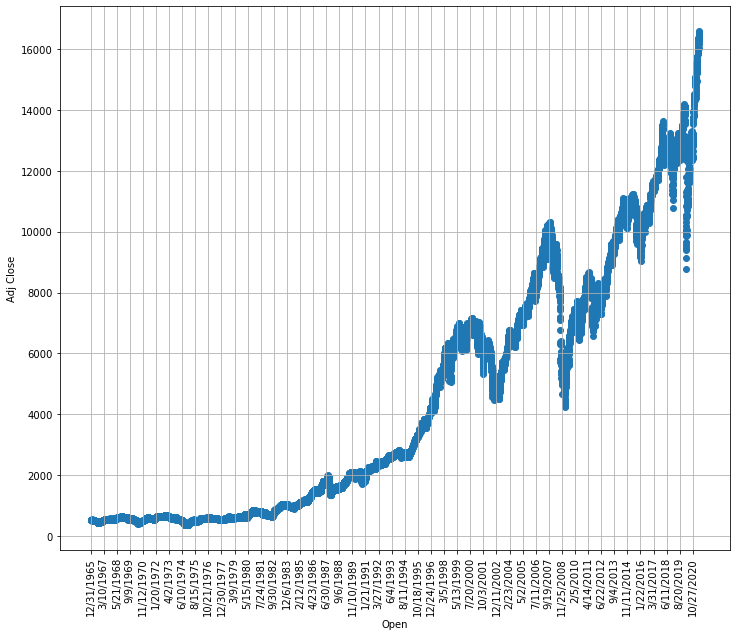

In [114]:
plt.figure(figsize=(12,10))
plt.scatter(df['Date'],df1['Adj Close'])
plt.xlabel('Open')
plt.xticks(df['Date'][::300])
plt.xticks(rotation=90)
plt.ylabel('Adj Close')
plt.grid()
plt.show()

In [115]:
df1.isna().sum()

Open          1
High          2
Low           3
Close         4
Adj Close    10
dtype: int64

In [116]:
df2=df1.dropna().round()
df2

,Open,High,Low,Close,Adj Close
Date,,,,,
1965-12-31,529.0,529.0,529.0,529.0,529.0
1966-01-03,527.0,527.0,527.0,527.0,527.0
1966-01-04,528.0,528.0,528.0,528.0,528.0
1966-01-05,531.0,531.0,531.0,531.0,531.0
1966-01-06,532.0,532.0,532.0,532.0,532.0
...,...,...,...,...,...
2021-05-24,16375.0,16509.0,16375.0,16465.0,16465.0
2021-05-25,16465.0,16526.0,16375.0,16390.0,16390.0
2021-05-26,16390.0,16466.0,16388.0,16452.0,16452.0


In [117]:
df2.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

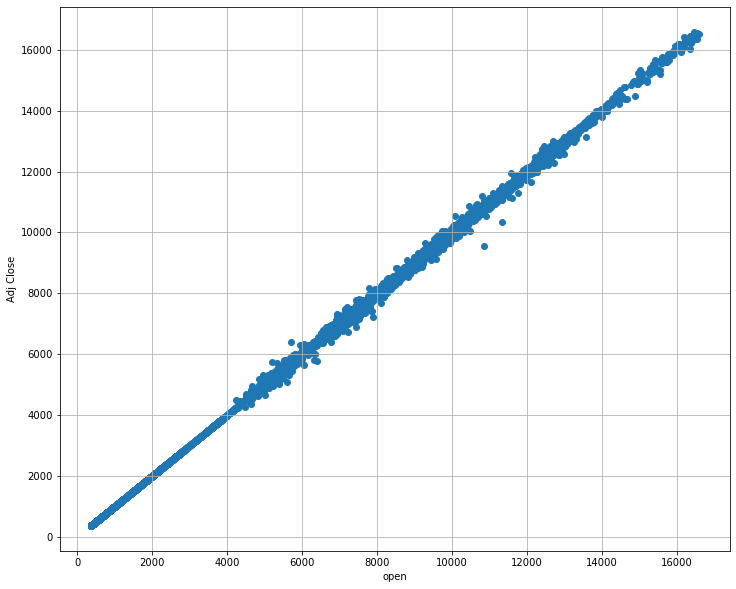

In [118]:
plt.figure(figsize=(12,10))
plt.scatter(df2['Open'],df2['Adj Close'])
plt.xlabel('open')
plt.ylabel('Adj Close')
plt.grid()
plt.show()

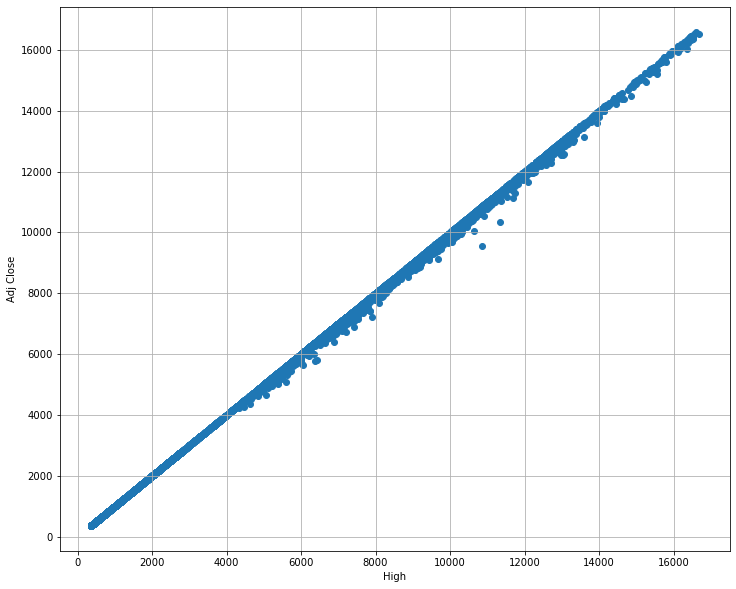

In [119]:
plt.figure(figsize=(12,10))
plt.scatter(df2['High'],df2['Adj Close'])
plt.xlabel('High')
plt.ylabel('Adj Close')
plt.grid()
plt.show()

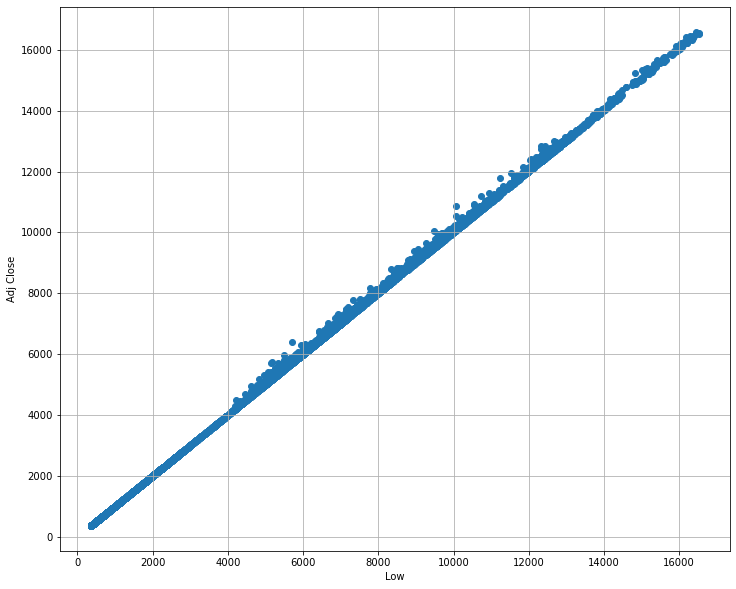

In [120]:
plt.figure(figsize=(12,10))
plt.scatter(df2['Low'],df2['Adj Close'])
plt.xlabel('Low')
plt.ylabel('Adj Close')
plt.grid()
plt.show()

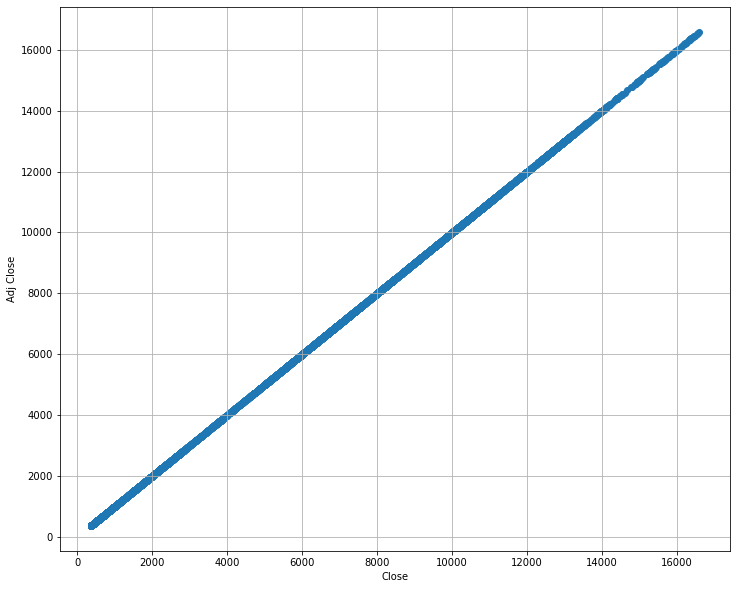

In [121]:
plt.figure(figsize=(12,10))
plt.scatter(df2['Close'],df2['Adj Close'])
plt.xlabel('Close')
plt.ylabel('Adj Close')
plt.grid()
plt.show()